# Stock price prediction

## Importing libraries

### Pandas

In [68]:
import pandas as pd

### NumPy

In [69]:
import numpy as np

### Matplotlib

In [70]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mandates

### SciKit-Learn

In [71]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

### Keras (Tensorflow)

In [72]:
from tensorflow.python.keras.layers import LSTM, Dense, Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
import tensorflow.python.keras.backend as K
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.python.keras.optimizers import adam_v2
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras.layers import LSTM
from tensorflow.python.keras.utils.vis_utils import plot_model

## Visualise dataset

### Load dataset

In [73]:
df = pd.read_csv('dataset/nvda_stock_history.csv', na_values=['null'], index_col='Date', parse_dates=True, infer_datetime_format=True)

/tmp/ipykernel_65943/4137364296.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('dataset/nvda_stock_history.csv', na_values=['null'], index_col='Date', parse_dates=True, infer_datetime_format=True)


### Print dataset's head

In [74]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,0.437500,0.488281,0.388021,0.410156,0.376358,271468800
1999-01-25,0.442708,0.458333,0.410156,0.453125,0.415786,51048000
1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383527,34320000
1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382332,24436800
1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381137,22752000


## Clean dataset

### Display dataset's head

In [75]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,0.437500,0.488281,0.388021,0.410156,0.376358,271468800
1999-01-25,0.442708,0.458333,0.410156,0.453125,0.415786,51048000
1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383527,34320000
1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382332,24436800
1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381137,22752000


### Checking is there is any `null` values

In [76]:
df.isnull().values.any()

False

### Fill the missing values using the mean of the column

In [77]:
df.fillna(df.mean(), inplace=True)

### Double check to see if we filled all the missing values

In [78]:
df.isnull().values.any()

False

## Visualising data

### Plotting the true Adjusted Close value

In [79]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

<Axes: xlabel='Date'>

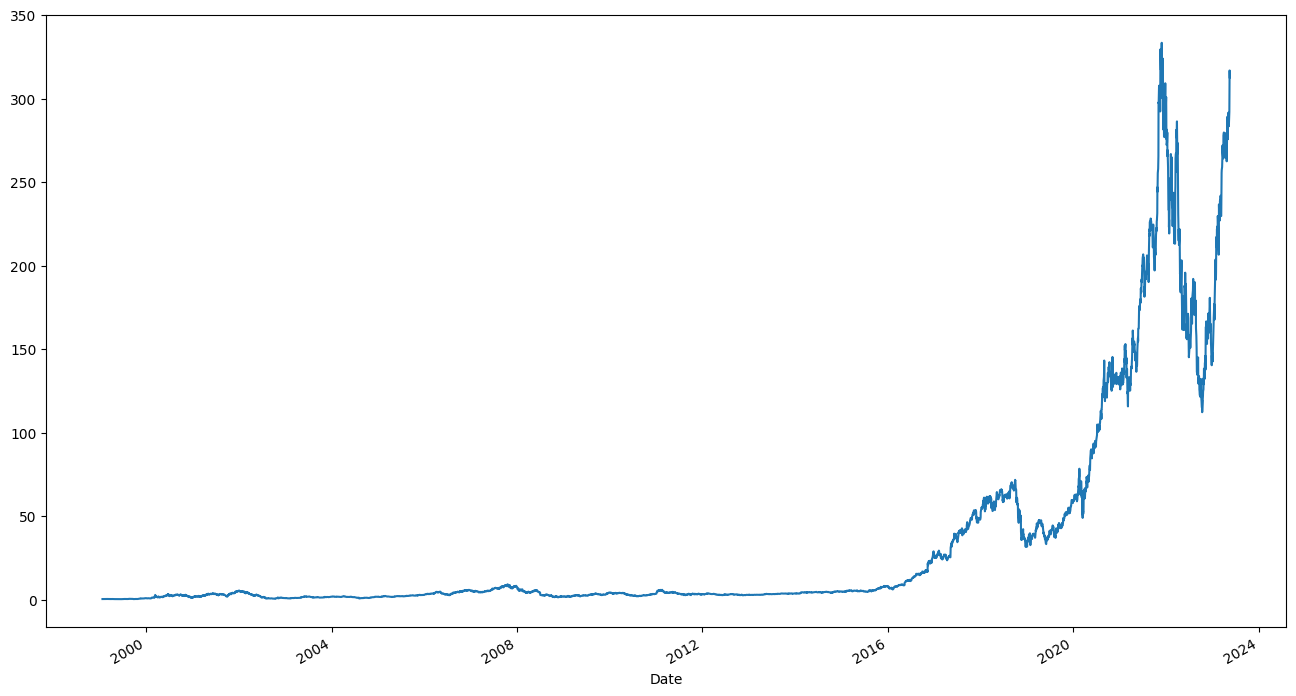

In [81]:
# Plot the adjusted closing price of NVDA
df['Adj Close'].plot(figsize=(16, 9))